In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
"""

Work up a minimum example of a trend following system

"""

# Get some data
from sysdata.csvdata import csvFuturesData
""""
Let's get some data

We can get data from various places; however for now we're going to use
   prepackaged 'legacy' data stored in csv files

"""

data = csvFuturesData()

print(data)

FuturesData object with 38 instruments


In [18]:
"""
We get stuff out of data with methods

"""
print(data.get_instrument_list())
print(data.get_instrument_price("EDOLLAR"))

['CORN', 'LEANHOG', 'LIVECOW', 'SOYBEAN', 'WHEAT', 'KR10', 'KR3', 'BOBL', 'BTP', 'BUND', 'OAT', 'SHATZ', 'US10', 'US2', 'US20', 'US5', 'V2X', 'VIX', 'KOSPI', 'AEX', 'CAC', 'SMI', 'NASDAQ', 'SP500', 'AUD', 'EUR', 'GBP', 'JPY', 'MXP', 'NZD', 'COPPER', 'GOLD', 'PALLAD', 'PLAT', 'CRUDE_W', 'GAS_US', 'EDOLLAR', 'EUROSTX']
                         price
1983-09-26 00:00:00  71.241192
1983-09-27 00:00:00  71.131192
1983-09-28 00:00:00  71.081192
1983-09-29 00:00:00  71.061192
1983-09-30 00:00:00  71.101192
1983-10-03 00:00:00  71.131192
1983-10-04 00:00:00  71.131192
1983-10-05 00:00:00  71.191192
1983-10-06 00:00:00  71.201192
1983-10-07 00:00:00  71.211192
1983-10-10 00:00:00  71.211192
1983-10-11 00:00:00  71.061192
1983-10-12 00:00:00  71.101192
1983-10-13 00:00:00  71.061192
1983-10-14 00:00:00  71.121192
1983-10-17 00:00:00  71.251192
1983-10-18 00:00:00  71.201192
1983-10-19 00:00:00  71.201192
1983-10-20 00:00:00  71.161192
1983-10-21 00:00:00  71.161192
1983-10-24 00:00:00  71.051192

In [19]:
"""
data can also behave in a dict like manner (though it's not a dict)
"""

print(data['SP500'])
print(data.keys())

                         price
1997-09-10 00:00:00  1082.1725
1997-09-11 00:00:00  1075.1725
1997-09-12 00:00:00  1091.1725
1997-09-15 00:00:00  1089.1725
1997-09-16 00:00:00  1113.1725
1997-09-17 00:00:00  1113.1725
1997-09-18 00:00:00  1115.1725
1997-09-19 00:00:00  1118.1725
1997-09-22 00:00:00  1123.1725
1997-09-23 00:00:00  1119.1725
1997-09-24 00:00:00  1112.1725
1997-09-25 00:00:00  1104.1725
1997-09-26 00:00:00  1110.1725
1997-09-29 00:00:00  1119.1725
1997-09-30 00:00:00  1111.1725
1997-10-01 00:00:00  1121.1725
1997-10-02 00:00:00  1126.1725
1997-10-03 00:00:00  1132.1725
1997-10-06 00:00:00  1139.1725
1997-10-07 00:00:00  1147.1725
1997-10-08 00:00:00  1140.1725
1997-10-09 00:00:00  1135.1725
1997-10-10 00:00:00  1134.1725
1997-10-13 00:00:00  1133.1725
1997-10-14 00:00:00  1134.1725
1997-10-15 00:00:00  1131.1725
1997-10-16 00:00:00  1117.1725
1997-10-17 00:00:00  1106.1725
1997-10-20 00:00:00  1120.1725
1997-10-21 00:00:00  1136.1725
...                        ...
2015-12-

In [20]:
"""

... however this will only access prices
(note these prices have already been backadjusted for rolls)

We have extra futures data here

"""

print(data.get_instrument_raw_carry_data("US10"))

                          PRICE     CARRY CARRY_CONTRACT PRICE_CONTRACT
1982-05-04 00:00:00   71.843750  71.96875         198212         198209
1982-05-05 00:00:00   71.937500  72.06250         198212         198209
1982-05-06 00:00:00   72.937500  73.03125         198212         198209
1982-05-07 00:00:00   73.218750  73.31250         198212         198209
1982-05-10 00:00:00   73.156250  73.25000         198212         198209
1982-05-11 00:00:00   73.250000  73.34375         198212         198209
1982-05-12 00:00:00   72.875000  72.96875         198212         198209
1982-05-13 00:00:00   72.625000  72.71875         198212         198209
1982-05-14 00:00:00   73.125000  73.21875         198212         198209
1982-05-17 00:00:00   72.656250  72.75000         198212         198209
1982-05-18 00:00:00   72.875000  72.96875         198212         198209
1982-05-19 00:00:00   72.468750  72.53125         198212         198209
1982-05-20 00:00:00   73.031250  73.03125         198212        

                        price
2015-12-11 12:00:25  0.241975
2015-12-11 14:11:34  0.292945
2015-12-11 15:39:37  0.339199
2015-12-11 17:08:14  0.422408
2015-12-11 19:33:39  0.542370


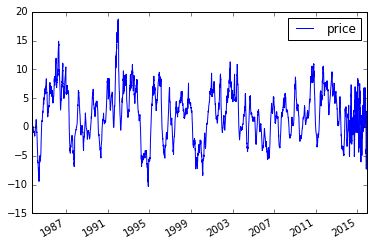

In [21]:
"""
Technical note: csvFuturesData inherits from FuturesData which itself inherits from Data
The chain is 'data specific' <- 'asset class specific' <- 'generic'

So there are also

In principal there could be an equities data
"""


"""
Let's create a simple trading rule

No capping or scaling

"""

import pandas as pd
from syscore.algos import robust_vol_calc
from syscore.pdutils import divide_df_single_column


def calc_ewmac_forecast(price, Lfast, Lslow=None):
    """
    Calculate the ewmac trading fule forecast, given a price and EWMA speeds
    Lfast, Lslow and vol_lookback

    Assumes that 'price' is daily data
    """
    # price: This is the stitched price series
    # We can't use the price of the contract we're trading, or the volatility
    # will be jumpy And we'll miss out on the rolldown. See
    # http://qoppac.blogspot.co.uk/2015/05/systems-building-futures-rolling.html

    if Lslow is None:
        Lslow = 4 * Lfast

    # We don't need to calculate the decay parameter, just use the span
    # directly

    fast_ewma = pd.ewma(price, span=Lfast)
    slow_ewma = pd.ewma(price, span=Lslow)
    raw_ewmac = fast_ewma - slow_ewma

    vol = robust_vol_calc(price.diff())

    return divide_df_single_column(raw_ewmac, vol)

"""
Try it out

(this isn't properly scaled at this stage of course)
"""
instrument_code = 'EDOLLAR'
price = data.get_instrument_price(instrument_code)
ewmac = calc_ewmac_forecast(price, 32, 128)
print(ewmac.tail(5))

ewmac.plot()

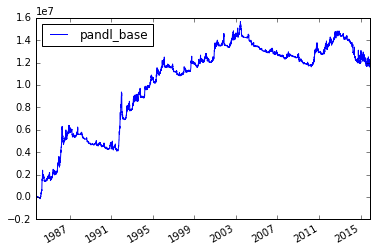

In [22]:
"""
Did we make money?
"""

from syscore.accounting import pandl
account = pandl(price, forecast=ewmac)
account.curve().plot()